[0.17747180068036328, 0.40016752267325495, 0.3931661821338015, 0.9371405456947781]
[0.17747180068036328, 0.40016752267325495, 0.3931661821338015, 0.9371405456947781]
[0, 0.1912456687895811, 0, 1]
[0, 0, 0, 1]
[0, 0.003033436717616314, 0.25350480691575406, 0.5750812190134998]
[0, 0.003033436717616314, 0.25350480691575406, 0.5750812190134998]
[0, 0.003033436717616314, 0.25350480691575406, 0.5750812190134998]
[0, 0.003033436717616314, 0.25350480691575406, 0.5750812190134998]
[0, 0.003033436717616314, 0.25350480691575406, 0.5750812190134998]
[0, 0.003033436717616314, 0.25350480691575406, 0.5750812190134998]
[0, 0.003033436717616314, 0.25350480691575406, 0.5750812190134998]
[0.15797662299326617, 0.007769802440195681, 0.3504563425759864, 0.3797768823867375]
[0, 0.026598687023088912, 0.045165051861325356, 0.33430922363595234]
[0, 0.19295464280121433, 0, 0.22886043106559967]
[0, 0.36823340546221184, 0, 0.09636470699609823]
[0, 0.36823340546221184, 0, 0.09636470699609823]
[0, 0.3682334054622118

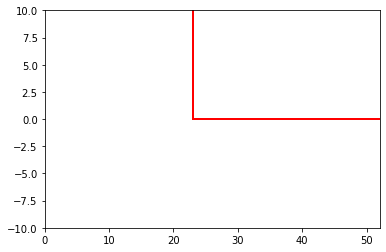

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

def objective_function(X):
    
    linear_constraint = X[0]*0.025+X[1]*0.1+X[2]*1+X[3]*2
    if linear_constraint <=0.12 and linear_constraint>0.08:
        penalty = 0
    else:
        penalty = 100000
  
    z =  X[0]*0.025*0.1+X[1]*0.1*0.2+X[2]*1*0.3+X[3]*2*0.15 +penalty
    
    return z
    
  
bounds = [(0,1), (0, 1),(0,1),(0,1)]  # upper and lower bounds of variables
nv = 4                                # number of variables
mm = -1                               # if minimization problem, mm = -1; if maximization problem, mm = 1
nn=-1  

particle_size = 20                   # number of particles
iterations = 50                       # max number of iterations
w = 0.75                              # inertia constant
c1 = 1                                # cognative constant
c2 = 2                                # social constant

fig = plt.figure()
ax = fig.add_subplot()
fig.show()

class Particle:
    def __init__(self, bounds):
      self.particle_position = []  
      self.particle_velocity = []  
      self.local_best_particle_position = []  
      self.fitness_local_best_particle_position = initial_fitness  
      self.fitness_particle_position = initial_fitness 
  
      for i in range(nv):
        self.particle_position.append(
              random.uniform(bounds[i][0], bounds[i][1]))
        self.local_best_particle_position.append(
              random.uniform(bounds[i][0], bounds[i][1]))   
        self.particle_velocity.append(random.uniform(0, 1))  
      
    def evaluate(self, objective_function):
      self.fitness_particle_position= objective_function(self.particle_position)
      if nn==-1:
        if self.fitness_particle_position<self.fitness_local_best_particle_position:
          self.local_best_particle_position=self.particle_position
          self.fitness_local_best_particle_position=self.fitness_particle_position
      if nn==1:
        if self.fitness_particle_position>self.fitness_local_best_particle_position:
          self.local_best_particle_position=self.particle_position
          self.fitness_local_best_particle_position=self.fitness_particle_position
    def update_velocity(self,global_best_particle_position):
      for i in range(nv):
        r1= random.uniform(0, 1)
        r2= random.uniform(0, 1)

        cognitive_velocity=c1*r1*(self.local_best_particle_position[i]-self.particle_position[i])
        social_velocity = c2* r2*(global_best_particle_position[i]-self.particle_position[i])
        self.particle_velocity[i]= w * self.particle_velocity[i]+cognitive_velocity +social_velocity

    def update_position(self,bounds) :
      for i in range(nv):
        self.particle_position[i] = self.particle_position[i]+self.particle_velocity[i]

        if self.particle_position[i] > bounds[i][1]:
          self.particle_position[i]= bounds[i][1]

        if self.particle_position[i] < bounds[i][0]:
          self.particle_position[i] = bounds[i][0]

if mm == -1:
  initial_fitness = float('inf') # for minimization problem

if mm == 1:
  initial_fitness = -float('inf') # for maximization probelm


fitness_global_best_particle_position = initial_fitness
global_best_particle_position=[]
global_best_particle_position.append(
              random.uniform(0,1))
global_best_particle_position.append(
              random.uniform(0,1))
global_best_particle_position.append(
              random.uniform(0,1))

global_best_particle_position.append(
              random.uniform(0,1))

swarm_particle=[]

for i in range(particle_size):
  swarm_particle.append(Particle(bounds))

A = []

for i in range(iterations):
  for j in range(particle_size):
    swarm_particle[j].evaluate(objective_function)

    if nn==-1:
      if swarm_particle[j].fitness_particle_position<fitness_global_best_particle_position:
        global_best_particle_position=list(swarm_particle[j].particle_position)
        fitness_global_best_particle_position=float(swarm_particle[j].fitness_particle_position)
    if nn==1:
      if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
        global_best_particle_position=list(swarm_particle[j].particle_position)
        fitness_global_best_particle_position=float(swarm_particle[j].fitness_particle_position)

    for j in range(particle_size):
      swarm_particle[j].update_velocity(global_best_particle_position)
      swarm_particle[j].update_position(bounds)

    print(global_best_particle_position)
    A.append(fitness_global_best_particle_position)


    ax.plot(A,color = 'r')

    fig.canvas.draw()

    ax.set_xlim(left = max(0, i - iterations), right = i +3)
    ax.set_ylim(bottom = -10, top = 10)


print('Optimal solution:', global_best_particle_position)
print('Objective function value:', fitness_global_best_particle_position)

plt.show()


[0.2714068813811932, 0.4324152848809165, 0.46169941278537374, 0.35638035803856083]
[0, 0.00303330796063056, 0.49623816863039344, 0]
[0, 0.00303330796063056, 0.49623816863039344, 0]
[0, 1, 0.6442296069810893, 0]
[0, 1, 0.6442296069810893, 0]
[0, 1, 0.6442296069810893, 0]
[0, 1, 0.6442296069810893, 0]
[0, 1, 0.6442296069810893, 0]
[0, 1, 0.6334645232756858, 0]
[0, 1, 0.6334645232756858, 0]
[0, 1, 0.6334645232756858, 0]
[0, 1, 0.6334645232756858, 0]
[0, 1, 0.6334645232756858, 0]
[0, 1, 0.6331291547306767, 0]
[0, 1, 0.6331291547306767, 0]
[0, 1, 0.6331291547306767, 0]
[0, 1, 0.6331291547306767, 0]
[0, 1, 0.6331291547306767, 0]
[0, 1, 0.6331291547306767, 0]
[0, 1, 0.6331291547306767, 0]
[0, 1, 0.6331291547306767, 0]
[0, 1, 0.6331291547306767, 0]
[0, 1, 0.6331291547306767, 0]
[0, 1, 0.6331291547306767, 0]
[0, 1, 0.6331291547306767, 0]
[0, 1, 0.6331291547306767, 0]
[0, 1, 0.6331291547306767, 0]
[0, 1, 0.6331291547306767, 0]
[0, 1, 0.6331291547306767, 0]
[0, 1, 0.6331291547306767, 0]
[0, 1, 0.

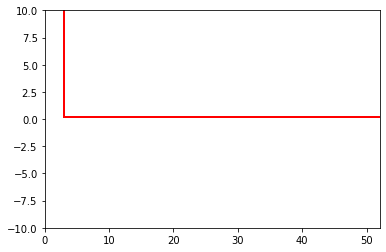

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

def objective_function(X):
    
    linear_constraint = X[0]*0.2+X[1]*0.1+X[2]*1+X[3]*2
    if linear_constraint>0.72 and linear_constraint <=0.78 :
        penalty = 0
    else:
        penalty = 100000
  
    z =  X[0]*0.2*0.1+X[1]*0.1*0.2+X[2]*1*0.3+X[3]*2*0.3 +penalty
    
    return z
    
  
bounds = [(0,1), (0, 1),(0,1),(0,1)]  # upper and lower bounds of variables
nv = 4                                # number of variables
mm = -1                               # if minimization problem, mm = -1; if maximization problem, mm = 1
nn=-1  

particle_size =  5                 # number of particles
iterations = 50                      # max number of iterations
w = 0.75                              # inertia constant
c1 = 1                                # cognative constant
c2 = 2                                # social constant

fig = plt.figure()
ax = fig.add_subplot()
fig.show()

class Particle:
    def __init__(self, bounds):
      self.particle_position = []  
      self.particle_velocity = []  
      self.local_best_particle_position = []  
      self.fitness_local_best_particle_position = initial_fitness  
      self.fitness_particle_position = initial_fitness 
  
      for i in range(nv):
        self.particle_position.append(
              random.uniform(bounds[i][0], bounds[i][1]))
        self.local_best_particle_position.append(
              random.uniform(bounds[i][0], bounds[i][1]))   
        self.particle_velocity.append(random.uniform(-1, 1))  
      
    def evaluate(self, objective_function):
      self.fitness_particle_position= objective_function(self.particle_position)
      if nn==-1:
        if self.fitness_particle_position<self.fitness_local_best_particle_position:
          self.local_best_particle_position=self.particle_position
          self.fitness_local_best_particle_position=self.fitness_particle_position
      if nn==1:
        if self.fitness_particle_position>self.fitness_local_best_particle_position:
          self.local_best_particle_position=self.particle_position
          self.fitness_local_best_particle_position=self.fitness_particle_position
    def update_velocity(self,global_best_particle_position):
      for i in range(nv):
        r1= random.random()
        r2= random.random()

        cognitive_velocity=c1*r1*(self.local_best_particle_position[i]-self.particle_position[i])
        social_velocity = c2* r2*(global_best_particle_position[i]-self.particle_position[i])
        self.particle_velocity[i]= w * self.particle_velocity[i]+cognitive_velocity +social_velocity

    def update_position(self,bounds) :
      for i in range(nv):
        self.particle_position[i] = self.particle_position[i]+self.particle_velocity[i]

        if self.particle_position[i] > bounds[i][1]:
          self.particle_position[i]= bounds[i][1]

        if self.particle_position[i] < bounds[i][0]:
          self.particle_position[i] = bounds[i][0]

if mm == -1:
  initial_fitness = float('inf') # for minimization problem

if mm == 1:
  initial_fitness = -float('inf') # for maximization probelm


fitness_global_best_particle_position = initial_fitness
global_best_particle_position=[]
global_best_particle_position.append(
              random.uniform(0,1))
global_best_particle_position.append(
              random.uniform(0,1))
global_best_particle_position.append(
              random.uniform(0,1))

global_best_particle_position.append(
              random.uniform(0,1))

swarm_particle=[]

for i in range(particle_size):
  swarm_particle.append(Particle(bounds))

A = []

for i in range(iterations):
  for j in range(particle_size):
    swarm_particle[j].evaluate(objective_function)

    if nn==-1:
      if swarm_particle[j].fitness_particle_position<fitness_global_best_particle_position:
        global_best_particle_position=list(swarm_particle[j].particle_position)
        fitness_global_best_particle_position=float(swarm_particle[j].fitness_particle_position)
    if nn==1:
      if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
        global_best_particle_position=list(swarm_particle[j].particle_position)
        fitness_global_best_particle_position=float(swarm_particle[j].fitness_particle_position)

    for j in range(particle_size):
      swarm_particle[j].update_velocity(global_best_particle_position)
      swarm_particle[j].update_position(bounds)

    print(global_best_particle_position)
    A.append(fitness_global_best_particle_position)


    ax.plot(A,color = 'r')

    fig.canvas.draw()

    ax.set_xlim(left = max(0, i - iterations), right = i +3)
    ax.set_ylim(bottom = -10, top = 10)


print('Optimal solution:', global_best_particle_position)
print('Objective function value:', fitness_global_best_particle_position)

plt.show()


[0.465685535007047, 0.6382105425513223, 0.07129427252802412, 0.08510637867306259]
[0.465685535007047, 0.6382105425513223, 0.07129427252802412, 0.08510637867306259]
[0.6241371293821018, 0.5593248149462765, 0, 0]
[0.7127708459583825, 0.3346511960558982, 0, 0]
[0.7127708459583825, 0.3346511960558982, 0, 0]
[0.7127708459583825, 0.3346511960558982, 0, 0]
[0.9296719022706696, 0.17962885336118622, 0, 0]
[0.9296719022706696, 0.17962885336118622, 0, 0]
[0.9296719022706696, 0.17962885336118622, 0, 0]
[1, 0.13471852616896493, 0, 0]
[1, 0.13471852616896493, 0, 0]
[1, 0.051266076733244216, 0, 0]
[1, 0.021266679554748456, 0, 0]
[1, 0.021266679554748456, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0

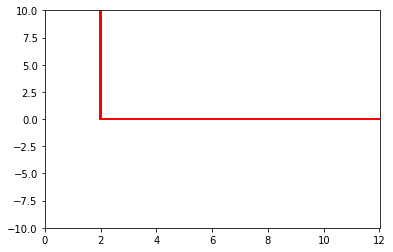

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

def objective_function(X):
    
    linear_constraint = X[0]*0.14+X[1]*0.125+X[2]*1+X[3]*2
    if linear_constraint>0.135 and linear_constraint <=0.165 :
        penalty = 0
    else:
        penalty = 100000
  
    z =  X[0]*0.14*0.1+X[1]*0.125*0.2+X[2]*1*0.3+X[3]*2*0.2 +penalty
    
    return z
    
  
bounds = [(0,1), (0, 1),(0,1),(0,1)]  # upper and lower bounds of variables
nv = 4                                # number of variables
mm = -1                               # if minimization problem, mm = -1; if maximization problem, mm = 1
nn=-1  

particle_size =  5                 # number of particles
iterations = 10                     # max number of iterations
w = 0.75                              # inertia constant
c1 = 1                                # cognative constant
c2 = 2                                # social constant

fig = plt.figure()
ax = fig.add_subplot()
fig.show()

class Particle:
    def __init__(self, bounds):
      self.particle_position = []  
      self.particle_velocity = []  
      self.local_best_particle_position = []  
      self.fitness_local_best_particle_position = initial_fitness  
      self.fitness_particle_position = initial_fitness 
  
      for i in range(nv):
        self.particle_position.append(
              random.uniform(bounds[i][0], bounds[i][1]))
        self.local_best_particle_position.append(
              random.uniform(bounds[i][0], bounds[i][1]))   
        self.particle_velocity.append(random.uniform(-1, 1))  
      
    def evaluate(self, objective_function):
      self.fitness_particle_position= objective_function(self.particle_position)
      if nn==-1:
        if self.fitness_particle_position<self.fitness_local_best_particle_position:
          self.local_best_particle_position=self.particle_position
          self.fitness_local_best_particle_position=self.fitness_particle_position
      if nn==1:
        if self.fitness_particle_position>self.fitness_local_best_particle_position:
          self.local_best_particle_position=self.particle_position
          self.fitness_local_best_particle_position=self.fitness_particle_position
    def update_velocity(self,global_best_particle_position):
      for i in range(nv):
        r1= random.random()
        r2= random.random()

        cognitive_velocity=c1*r1*(self.local_best_particle_position[i]-self.particle_position[i])
        social_velocity = c2* r2*(global_best_particle_position[i]-self.particle_position[i])
        self.particle_velocity[i]= w * self.particle_velocity[i]+cognitive_velocity +social_velocity

    def update_position(self,bounds) :
      for i in range(nv):
        self.particle_position[i] = self.particle_position[i]+self.particle_velocity[i]

        if self.particle_position[i] > bounds[i][1]:
          self.particle_position[i]= bounds[i][1]

        if self.particle_position[i] < bounds[i][0]:
          self.particle_position[i] = bounds[i][0]

if mm == -1:
  initial_fitness = float('inf') # for minimization problem

if mm == 1:
  initial_fitness = -float('inf') # for maximization probelm


fitness_global_best_particle_position = initial_fitness
global_best_particle_position=[]
global_best_particle_position.append(
              random.uniform(0,1))
global_best_particle_position.append(
              random.uniform(0,1))
global_best_particle_position.append(
              random.uniform(0,1))

global_best_particle_position.append(
              random.uniform(0,1))

swarm_particle=[]

for i in range(particle_size):
  swarm_particle.append(Particle(bounds))

A = []

for i in range(iterations):
  for j in range(particle_size):
    swarm_particle[j].evaluate(objective_function)

    if nn==-1:
      if swarm_particle[j].fitness_particle_position<fitness_global_best_particle_position:
        global_best_particle_position=list(swarm_particle[j].particle_position)
        fitness_global_best_particle_position=float(swarm_particle[j].fitness_particle_position)
    if nn==1:
      if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
        global_best_particle_position=list(swarm_particle[j].particle_position)
        fitness_global_best_particle_position=float(swarm_particle[j].fitness_particle_position)

    for j in range(particle_size):
      swarm_particle[j].update_velocity(global_best_particle_position)
      swarm_particle[j].update_position(bounds)

    print(global_best_particle_position)
    A.append(fitness_global_best_particle_position)


    ax.plot(A,color = 'r')

    fig.canvas.draw()

    ax.set_xlim(left = max(0, i - iterations), right = i +3)
    ax.set_ylim(bottom = -10, top = 10)


print('Optimal solution:', global_best_particle_position)
print('Objective function value:', fitness_global_best_particle_position)

plt.show()
